In [3]:
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from scipy import interpolate
from scipy.integrate import odeint

In [4]:
def model(y, t, params):

    b = 1000  # (dissipation-friction coefficient) parameter taken from the paper
    d = 10**8  # (nonlinear dissipation coefficient for bounded motion) parameter taken from the paper
    # Unpack the state variables
    x, v = y
    
    #params
    p,k= zip(*params)
    pt = np.interp(t, t, p)
    kt = np.interp(t, t, k)

    # Define the derivatives
    dxdt = v
    dvdt = -(pt - b) * v - kt * x - d * (x**2) * v
    
    return [dxdt, dvdt]

class DataPointInputGUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Data Point Input")

        self.fig, self.ax = plt.subplots()
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Y')
        self.ax.set_title('X vs Y')
        self.ax.set_xlim(10**8, 10**9)
        self.ax.set_ylim(-1000, 3000)
        self.t_new = []
        self.points = []
        self.line, = self.ax.plot([], [], color='blue')

        self.canvas = FigureCanvasTkAgg(self.fig, master=master)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        self.cid = self.fig.canvas.mpl_connect('button_press_event', self.onclick)

        self.button_clear = tk.Button(master, text="Clear Points", command=self.clear_points)
        self.button_clear.pack(side=tk.BOTTOM)

        self.button_simulate = tk.Button(master, text="Run Simulation", command=self.run_simulation)
        self.button_simulate.pack(side=tk.BOTTOM)

    def onclick(self, event):
        if event.inaxes == self.ax:
            x = event.xdata
            y = event.ydata
            if 10**8 <= x <= 10**9 and -1000<= y <= 3000:
                self.points.append((x, y))
                self.update_plot()
            else:
                tk.messagebox.showwarning("Warning", "Data point must be within the range [1, 2] for both X and Y")

    def update_plot(self):
        self.ax.clear()
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Y')
        self.ax.set_title('X vs Y')
        self.ax.set_xlim(10**8, 10**9)
        self.ax.set_ylim(-1000, 3000)
        if self.points:
            xs, ys = zip(*self.points)
            #xs, ys = self.interpolate(xs, ys)
            self.line, = self.ax.plot(xs, ys, color='blue')
        self.canvas.draw()

    def interpolate(self, xs, ys):
        xs = np.array(xs)
        ys = np.array(ys)
        xs = np.append(xs, xs[0])  # Closing the curve
        ys = np.append(ys, ys[0])  # Closing the curve
        t = np.linspace(10**8, 10**9, len(xs))
        self.t_new = np.linspace(10**8, 10**9, 10*len(xs))
        f_x = interpolate.interp1d(t, xs, kind='cubic')
        f_y = interpolate.interp1d(t, ys, kind='cubic')
        xs_new = f_x(self.t_new)
        ys_new = f_y(self.t_new)
        return xs_new, ys_new

    def clear_points(self):
        self.points = []
        self.update_plot()
    
    def run_simulation(self):
        y0 = [0.01, 0.01]  # Initial conditions
        Fs = 22050  # sampling frequency
        t = np.arange(0, 0.24, 1/Fs)
        z1 = odeint(model, y0, t, args=(self.points,))
        song = z1[:, 0]
        print(song)
        self.update_plot()


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/tkinter/__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/sl/rt_4vr2j0w94435ltx7d056r0000gq/T/ipykernel_17031/644238071.py", line 90, in run_simulation
    z1 = odeint(model, y0, t, args=(self.points,))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/integrate/_odepack_py.py", line 243, in odeint
    output = _odepack.odeint(func, y0, t, args, Dfun, col_deriv, ml, mu,
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/sl/rt_4vr2j0w94435ltx7d056r0000gq/T/ipykernel_17031/644238071.py", line 10, in model
    pt = np.interp(t, t, p)
         ^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/

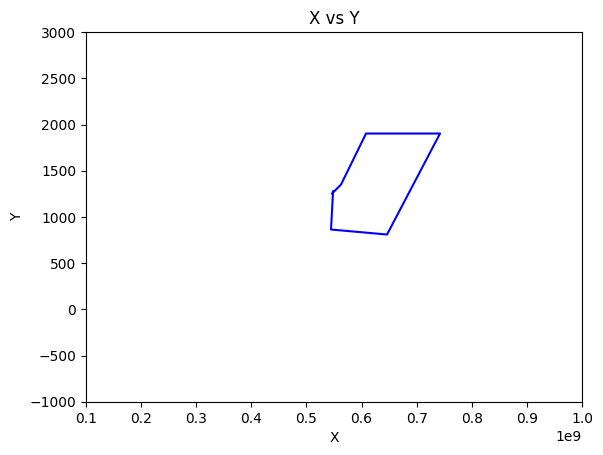

In [6]:

def main():
    root = tk.Tk()
    app = DataPointInputGUI(root)
    root.mainloop()

if __name__ == "__main__":
    main()


In [ ]:
points = [(205241935.48387095, 712.121212121212), (299596774.1935484, 1523.8095238095239), (631653225.8064516, 1740.2597402597403), (684274193.548387, 766.2337662337663), (535483870.9677419, -23.809523809523853), (339516129.03225803, -261.9047619047619), (190725806.4516129, 116.88311688311683), (138104838.70967743, 1015.151515151515), (328629032.2580645, 2032.4675324675327), (442943548.38709676, 1080.08658008658), (283266129.03225803, 593.0735930735932), (156250000.0, 896.1038961038962), (252419354.83870965, 1339.8268398268401), (308669354.83870965, 1004.3290043290044), (261491935.48387098, 701.2987012987014), (239717741.93548387, 733.7662337662337), (223387096.77419353, 712.121212121212)]

y0 = [0.01, 0.01]  # Initial conditions
Fs = 22050  # sampling frequency
t = np.arange(0, 0.24, 1/Fs)
z1 = odeint(model, y0, t, args=(points,))

In [7]:
import numpy as np
from scipy.integrate import odeint

def singSyllable(rho):
    Fs = 22050  # sampling frequency
    t = np.arange(0, 0.24, 1/Fs)
    
    # Define kt and pt functions
    #kt = 4 * 10**8 * np.cos(4 * np.pi * t + rho) + 9 * 10**8
    #pt = 1005 + 1000 * np.cos(4 * np.pi * t)

    def kt(t,rho):
        return 4 * 10**8 * np.cos(2* np.pi * t/.24 + rho) + 9 * 10**8
    def pt(t,rho):
        return 2005 + 1000 * np.cos(2* np.pi * t/.24)
    # Solve differential equation
    def syrinx(y, t,rho):
        b = 1000  # (dissipation-friction coefficient)
        d = 10**8  # (nonlinear dissipation coefficient for bounded motion)
        yprime = np.zeros(2)
        yprime[0] = y[1]
        #pt_interp = np.interp(t, t, pt)
        #kt_interp = np.interp(t, t, kt)
        yprime[1] = (pt(t,rho) - b) * y[1] - kt(t,rho) * y[0] - d * (y[0]**2) * y[1]
        return yprime
    
    y0 = [0.01, 0.01]  # Initial conditions
    
    # Ensure t, pt, and kt are 1-dimensional arrays
    t = np.atleast_1d(t)
    #pt = np.atleast_1d(pt)
    #kt = np.atleast_1d(kt)
    
    z1 = odeint(syrinx, y0, t, args=(rho,))
    song = z1[:, 0]
    
    return t, song

t, song = singSyllable(0)


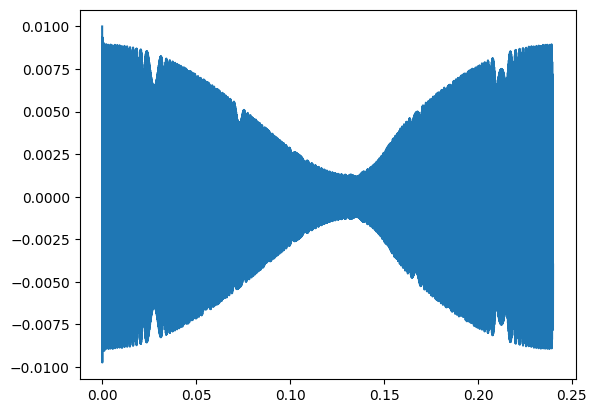

In [8]:
plt.plot(t,song)

In [ ]:
from scipy.fft import fft, fftfreq
Fs = 22050
s_fft = fft(song)
t_fft = fftfreq(len(t),1/Fs)[0:len(t)//2]

plt.plot(t_fft,2.0/len(t) * np.abs(s_fft[0:len(t)//2]))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq
from ipywidgets import interact

def singSyllable(rho):
    Fs = 22050  # sampling frequency
    t = np.arange(0, 0.24, 1/Fs) #time sample points
    
    #spring constant function
    def kt(t,rho):
        return 4 * 10**8 * np.cos(2 * np.pi * t/.24 + rho) + 9 * 10**8
        #return 5*10**8
    
    #presure diff function
    def pt(t,rho):
        return 1005 + 1000 * np.cos(2 * np.pi * t/.24)
        #return 2500
    
    #main diff equation
    def syrinx(y, t,rho):
        b = 1000
        d = 10**8
        yprime = np.zeros(2)
        yprime[0] = y[1]
        yprime[1] = (pt(t,rho) - b) * y[1] - kt(t,rho) * y[0] - d * (y[0]**2) * y[1]
        return yprime
    
    #init condition
    y0 = [0.01, 0.01]
    
    #ode solver
    z = odeint(syrinx, y0, t, args=(rho,))
    song = z[:, 0]
    
    return t, song

def plot_wave_and_fft(rho):
    t, song = singSyllable(rho)
    
    #plt.figure(figsize=(12, 6))
    fig,(ax1,ax2,ax3) = plt.subplots(nrows=3)
    # Plot wave
    #plt.subplot(3, 1, 1)
    ax1.plot(t, song)
    ax1.set_title('Waveform')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    
    # Calculate FFT
    Fs = 22050
    s_fft = fft(song)
    t_fft = fftfreq(len(t), 1/Fs)[0:len(t)//2]
    
    # Plot FFT
    #plt.subplot(3, 1, 2)
    ax2.plot(t_fft, 2.0/len(t) * np.abs(s_fft[0:len(t)//2]))
    ax2.set_title('FFT')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Amplitude')
    
    
    
    # Plot FFT
    #plt.subplot(3, 1, 2)
    ax3.specgram(song,Fs=Fs)
    ax3.set_title('sonogram')
    ax3.set_ylabel('Frequency (Hz)')
    ax3.set_xlabel('time')
    ax3.set_ylim(2500, 6000)
    plt.tight_layout()
    plt.show()
# Add slider for rho
interact(plot_wave_and_fft, rho=(0, 2*np.pi, 0.01))


interactive(children=(FloatSlider(value=3.14, description='rho', max=6.283185307179586, step=0.01), Output()),…

<function __main__.plot_wave_and_fft(rho)>

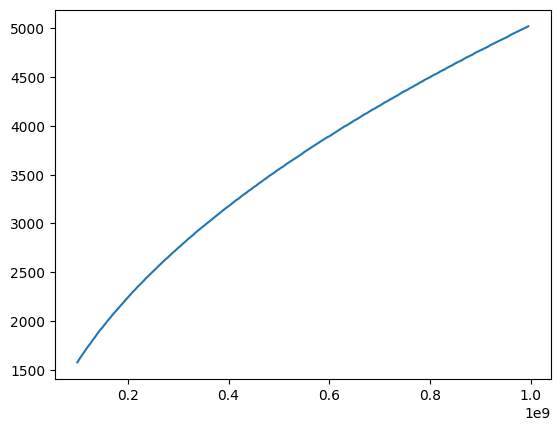

In [3]:
Freq1 = np.load('freq.npy')
Amp1 = np.load('amp.npy')
K = np.arange(10**8, 10**9, 5*10**6)
P = np.arange(-1000, 5000, 50)
plt.plot(K,Freq1[110])
plt.show()

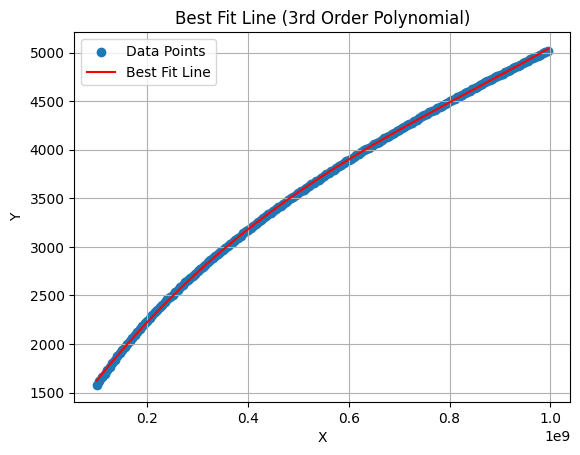

In [8]:
# Perform polynomial regression of 3rd order
coefficients = np.polyfit(K, Freq1[110], 3)

# Create the best-fit line
best_fit = np.poly1d(coefficients)

# Generate x values for plotting
x_values = np.linspace(min(K), max(K), 100)

# Calculate corresponding y values for the best-fit line
y_values = best_fit(x_values)

# Plot the original data points
plt.scatter(K, Freq1[110], label='Data Points')

# Plot the best-fit line
plt.plot(x_values, y_values, color='red', label='Best Fit Line')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Fit Line (3rd Order Polynomial)')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [9]:
print(best_fit)

           3             2
2.228e-24 x - 5.642e-15 x + 7.539e-06 x + 926.4
